In [16]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
%autoreload 2

In [18]:
import numpy as np
import HW01_utils as utils
import trainfunctions as tf

In [46]:
_LOCAL_PATH = r"C:\Users\Mitch\Documents\Cal\2 - 2017 Spring\COMPSCI 289A - Intro to Machine Learning\HW01"
_DATA_PATH = "Data\hw01_data"

_DATA_DIR = _LOCAL_PATH + "\\" + _DATA_PATH
trainpath = r"mnist\train.mat"

In [20]:
valsetsize = 10000
samples = np.array([100, 200, 500, 1000, 2000, 5000, 10000])
hyperparams = np.logspace(-8,4,num=20)

In [21]:
# Load MNIST training data
mnist = utils.loaddata(trainpath,_DATA_DIR,'trainX')

# Shuffle data before splitting
np.random.shuffle(mnist)

In [22]:
trainset,valset = utils.partition(valsetsize,mnist)
trainsetarrays,trainsetlabels = utils.separatelabels(trainset)
valsetarrays,valsetlabels = utils.separatelabels(valset)

In [23]:
Accs = np.empty((len(samples),len(hyperparams)))
i = 0 # sample index counter
for nsamples in samples:
    print(nsamples,'samples')
    j = 0 # hyperparameter index counter
    for hp in hyperparams:
        acc = tf.TrainAndScoreNsamples(trainsetarrays[:nsamples],trainsetlabels[:nsamples],valsetarrays,valsetlabels,hp)
        print('\tC =',hp,'\tAccuracy:',acc)
        Accs[i,j] = acc
        j+=1
    i+=1
print(Accs)



100 samples
	C = 1e-08 	Accuracy: 0.1119
	C = 4.28133239872e-08 	Accuracy: 0.2301
	C = 1.83298071083e-07 	Accuracy: 0.6438
	C = 7.84759970351e-07 	Accuracy: 0.7169
	C = 3.35981828628e-06 	Accuracy: 0.7133
	C = 1.43844988829e-05 	Accuracy: 0.7133
	C = 6.15848211066e-05 	Accuracy: 0.7133
	C = 0.000263665089873 	Accuracy: 0.7133
	C = 0.00112883789168 	Accuracy: 0.7133
	C = 0.00483293023857 	Accuracy: 0.7133
	C = 0.0206913808111 	Accuracy: 0.7133
	C = 0.088586679041 	Accuracy: 0.7133
	C = 0.379269019073 	Accuracy: 0.7133
	C = 1.62377673919 	Accuracy: 0.7133
	C = 6.95192796178 	Accuracy: 0.7133
	C = 29.7635144163 	Accuracy: 0.7133
	C = 127.42749857 	Accuracy: 0.7133
	C = 545.559478117 	Accuracy: 0.7133
	C = 2335.72146909 	Accuracy: 0.7133
	C = 10000.0 	Accuracy: 0.7133
200 samples
	C = 1e-08 	Accuracy: 0.0963
	C = 4.28133239872e-08 	Accuracy: 0.425
	C = 1.83298071083e-07 	Accuracy: 0.7747
	C = 7.84759970351e-07 	Accuracy: 0.8005
	C = 3.35981828628e-06 	Accuracy: 0.7947
	C = 1.43844988829e-0

In [28]:
# Find the index of the maximum value in the accuracies table
maxindex = np.array([int(len(Accs)*np.argmax(Accs)/(len(Accs.flatten()))),np.argmax(Accs)%len(Accs[0])])
print('The index of the maximum accuracy ('+str(Accs[maxindex[0],maxindex[1]])+') is:',maxindex)

besthp = hyperparams[maxindex[1]]
bestns = samples[maxindex[0]]
# Determine which sample count-hyperparameter combination this corresponds to
print('This corresponds to a hyperparameter of C = '+ str(besthp) + ' when training on ' + str(bestns) + ' samples.')


The index of the maximum accuracy (0.9298) is: [6 3]
This corresponds to a hyperparameter of C = 7.84759970351e-07 when training on 10000 samples.


In [29]:
besthp = 7.84759970351e-07
bestns = 10000

In [30]:
# Load test data
testpath = r"mnist\test.mat"
mnist_test = utils.loaddata(testpath,_DATA_DIR,'testX')
predictions = tf.TrainAndPredictNsamples(trainsetarrays[:bestns],trainsetlabels[:bestns],mnist_test,besthp)

In [27]:
IDs = np.arange(len(predictions))
numpycsv = np.c_[IDs,predictions]
np.savetxt(_LOCAL_PATH+r'\MNIST_testpredictions.csv',numpycsv,fmt='%i',delimiter=',',header='Id,Category',comments='')

In [31]:
from matplotlib import pyplot as plt

In [32]:
hpC1 = 13

In [33]:
errors = np.ones_like(Accs[:,hpC1])-Accs[:,hpC1]

In [42]:
fig = plt.figure()
plt.plot(samples,errors)
plt.title('Error on Datasets of Varying Size')
plt.xlabel('# Training Samples')
plt.ylabel('Error')
plt.text(8000,0.275,'C = '+str(round(hyperparams[hpC1],4)))

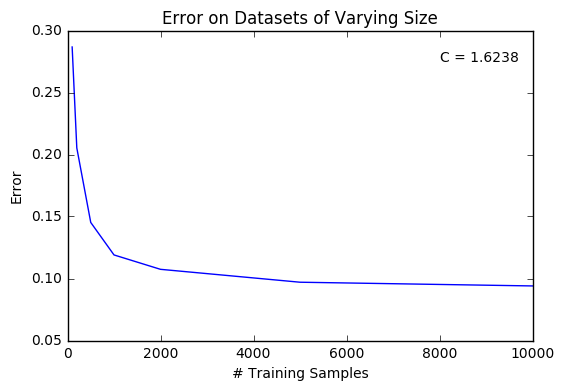

In [43]:
plt.show()

In [47]:
fig.savefig(_LOCAL_PATH+r'\Figures\MNIST_SampleAcc.jpg')

In [ ]:
# Export data to csv files for report
np.savetxt(_LOCAL_PATH+r'\MNIST_Accuracies.csv',Accs,fmt='%f',delimiter=',',comments='')
np.savetxt(_LOCAL_PATH+r'\MNIST_hyperparams.csv',hyperparams,fmt='%.8f',delimiter=',',comments='')